# Import functions

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/housing_price/sample_submission.csv')
train = pd.read_csv('/content/drive/MyDrive/housing_price/train.csv')
test = pd.read_csv('/content/drive/MyDrive/housing_price/test.csv')

In [ ]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# Exploratory data analysis

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.iloc[:,80].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
sale0 = train.iloc[:,80] 
sale1 = train.iloc[:,1:2] 
sale2 = train.iloc[:,74:76] 
sale = pd.concat([sale0,sale1,sale2], axis = 'columns')

In [ ]:
sale

,SalePrice,MSSubClass,MiscFeature,MiscVal
0,208500,60,NaN,0
1,181500,20,NaN,0
2,223500,60,NaN,0
3,140000,70,NaN,0
4,250000,60,NaN,0
...,...,...,...,...
1455,175000,60,NaN,0
1456,210000,20,NaN,0
1457,266500,70,Shed,2500
1458,142125,20,NaN,0


In [ ]:
sale.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [ ]:
sale_shed = sale.loc[sale['MiscFeature'] == 'Shed']

In [ ]:
sale_shed #add shed size feature

,SalePrice,MSSubClass,MiscFeature,MiscVal
5,143000,50,Shed,700
7,200000,60,Shed,350
16,149000,20,Shed,700
17,90000,90,Shed,500
51,114500,50,Shed,400
84,168500,80,Shed,700
95,185000,60,Shed,480
98,83000,30,Shed,400
99,128950,20,Shed,400
106,100000,30,Shed,450


In [ ]:
sale_Gar2 = sale.loc[sale['MiscFeature'] == 'Gar2']

In [ ]:
sale_Gar2  #is adding second garage size neccesary?

,SalePrice,MSSubClass,MiscFeature,MiscVal
346,151500,20,Gar2,15500
1230,190000,90,Gar2,8300


# Data cleaning

In [ ]:
location_properties1 = train.iloc[:,2:9] 
location_properties2 = train.iloc[:,10] 
location_properties3 = train.iloc[:,12:15] 
location_properties = pd.concat([location_properties1,location_properties2,location_properties3], axis = 'columns')

In [ ]:
location_properties

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,Inside,CollgCr,Norm,Norm
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,FR2,Veenker,Feedr,Norm
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,Inside,CollgCr,Norm,Norm
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,Corner,Crawfor,Norm,Norm
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,FR2,NoRidge,Norm,Norm
...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Pave,NaN,Reg,Lvl,Inside,Gilbert,Norm,Norm
1456,RL,85.0,13175,Pave,NaN,Reg,Lvl,Inside,NWAmes,Norm,Norm
1457,RL,66.0,9042,Pave,NaN,Reg,Lvl,Inside,Crawfor,Norm,Norm
1458,RL,68.0,9717,Pave,NaN,Reg,Lvl,Inside,NAmes,Norm,Norm


In [ ]:
location_properties.isna().sum()

MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
Condition2         0
dtype: int64

In [ ]:
location_properties.Alley = location_properties.Alley.fillna('No')

In [ ]:
location_properties.LotFrontage = location_properties.LotFrontage.fillna(0) #house to road 

In [ ]:
location_properties.isna().sum()

MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
LotConfig       0
Neighborhood    0
Condition1      0
Condition2      0
dtype: int64

In [ ]:
architectural_properties1 = train.iloc[:,9]
architectural_properties2 = train.iloc[:,11] 
architectural_properties3 = train.iloc[:,15:19] 
architectural_properties4 = train.iloc[:,21:59] 
architectural_properties5 = train.iloc[:,60:74] 
architectural_properties6 = train.iloc[:,78:80] 
architectural_properties = pd.concat([architectural_properties1,architectural_properties2,architectural_properties3,architectural_properties4,architectural_properties5,architectural_properties6], axis = 'columns')

In [ ]:
architectural_properties

,Utilities,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,SaleType,SaleCondition
0,AllPub,Gtl,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,...,0,61,0,0,0,0,NaN,NaN,WD,Normal
1,AllPub,Gtl,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,...,298,0,0,0,0,0,NaN,NaN,WD,Normal
2,AllPub,Gtl,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,...,0,42,0,0,0,0,NaN,NaN,WD,Normal
3,AllPub,Gtl,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,...,0,35,272,0,0,0,NaN,NaN,WD,Abnorml
4,AllPub,Gtl,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,...,192,84,0,0,0,0,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,AllPub,Gtl,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,...,0,40,0,0,0,0,NaN,NaN,WD,Normal
1456,AllPub,Gtl,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,...,349,0,0,0,0,0,NaN,MnPrv,WD,Normal
1457,AllPub,Gtl,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,...,0,60,0,0,0,0,NaN,GdPrv,WD,Normal
1458,AllPub,Gtl,1Fam,1Story,5,6,Hip,CompShg,MetalSd,MetalSd,...,366,0,112,0,0,0,NaN,NaN,WD,Normal


In [ ]:
architectural_properties.isna().sum()

Utilities           0
LandSlope           0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageCars

In [ ]:
architectural_properties.BsmtQual = architectural_properties.BsmtQual.fillna('No')
architectural_properties.BsmtCond = architectural_properties.BsmtCond.fillna('No')
architectural_properties.BsmtExposure = architectural_properties.BsmtExposure.fillna('No')
architectural_properties.BsmtFinType1 = architectural_properties.BsmtFinType1.fillna('No')
architectural_properties.BsmtFinType2 = architectural_properties.BsmtFinType2.fillna('No')
architectural_properties.Electrical = architectural_properties.Electrical.fillna(str(architectural_properties.Electrical.mode()))
architectural_properties.FireplaceQu = architectural_properties.FireplaceQu.fillna('No')
architectural_properties.GarageQual = architectural_properties.GarageQual.fillna('No')
architectural_properties.GarageCond = architectural_properties.GarageCond.fillna('No')
architectural_properties.GarageType = architectural_properties.GarageType.fillna('No')
architectural_properties.GarageFinish = architectural_properties.GarageFinish.fillna('No')
architectural_properties.PoolQC = architectural_properties.PoolQC.fillna('No') #pool area 0? 
architectural_properties.Fence = architectural_properties.Fence.fillna('No')

In [ ]:
architectural_properties.isna().sum()

Utilities        0
LandSlope        0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [ ]:
year_properties1 = train.iloc[:,19:21]
year_properties2 = train.iloc[:,59]
year_properties3 = train.iloc[:,76:78]
year_properties = pd.concat([year_properties1,year_properties2,year_properties3], axis = 'columns')

In [ ]:
year_properties #year built relation to style 

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,2003,2003,2003.0,2,2008
1,1976,1976,1976.0,5,2007
2,2001,2002,2001.0,9,2008
3,1915,1970,1998.0,2,2006
4,2000,2000,2000.0,12,2008
...,...,...,...,...,...
1455,1999,2000,1999.0,8,2007
1456,1978,1988,1978.0,2,2010
1457,1941,2006,1941.0,5,2010
1458,1950,1996,1950.0,4,2010


In [ ]:
year_style = pd.concat([train.iloc[:,19],train.iloc[:,16]], axis = 'columns')

In [ ]:
year_style.groupby(['YearBuilt'])['HouseStyle'].agg(pd.Series.mode).to_frame()

,HouseStyle
YearBuilt,
1872,2Story
1875,1.5Fin
1880,2Story
1882,2Story
1885,"[1Story, 2Story]"
...,...
2006,1Story
2007,1Story
2008,1Story


In [ ]:
year_properties.isna().sum() 

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
MoSold           0
YrSold           0
dtype: int64

In [ ]:
year_properties.GarageYrBlt.mode()

0    2005.0
dtype: float64

In [ ]:
year_properties.GarageYrBlt = year_properties.GarageYrBlt.fillna(2005)

In [ ]:
location_properties

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2
0,RL,65.0,8450,Pave,No,Reg,Lvl,Inside,CollgCr,Norm,Norm
1,RL,80.0,9600,Pave,No,Reg,Lvl,FR2,Veenker,Feedr,Norm
2,RL,68.0,11250,Pave,No,IR1,Lvl,Inside,CollgCr,Norm,Norm
3,RL,60.0,9550,Pave,No,IR1,Lvl,Corner,Crawfor,Norm,Norm
4,RL,84.0,14260,Pave,No,IR1,Lvl,FR2,NoRidge,Norm,Norm
...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Pave,No,Reg,Lvl,Inside,Gilbert,Norm,Norm
1456,RL,85.0,13175,Pave,No,Reg,Lvl,Inside,NWAmes,Norm,Norm
1457,RL,66.0,9042,Pave,No,Reg,Lvl,Inside,Crawfor,Norm,Norm
1458,RL,68.0,9717,Pave,No,Reg,Lvl,Inside,NAmes,Norm,Norm


In [ ]:
location_properties = pd.concat([location_properties.iloc[:,:],train.iloc[:,80]], axis = 'columns')

# Feature engineering

In [ ]:
location_properties

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,SalePrice
0,RL,65.0,8450,Pave,No,Reg,Lvl,Inside,CollgCr,Norm,Norm,208500
1,RL,80.0,9600,Pave,No,Reg,Lvl,FR2,Veenker,Feedr,Norm,181500
2,RL,68.0,11250,Pave,No,IR1,Lvl,Inside,CollgCr,Norm,Norm,223500
3,RL,60.0,9550,Pave,No,IR1,Lvl,Corner,Crawfor,Norm,Norm,140000
4,RL,84.0,14260,Pave,No,IR1,Lvl,FR2,NoRidge,Norm,Norm,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,Pave,No,Reg,Lvl,Inside,Gilbert,Norm,Norm,175000
1456,RL,85.0,13175,Pave,No,Reg,Lvl,Inside,NWAmes,Norm,Norm,210000
1457,RL,66.0,9042,Pave,No,Reg,Lvl,Inside,Crawfor,Norm,Norm,266500
1458,RL,68.0,9717,Pave,No,Reg,Lvl,Inside,NAmes,Norm,Norm,142125


In [ ]:
MSZoning = location_properties.MSZoning
MSZoning = pd.get_dummies(MSZoning)
Street = location_properties.Street
Street = pd.get_dummies(Street)
Alley = location_properties.Alley
Alley = pd.get_dummies(Alley)
LotShape = location_properties.LotShape
LotShape = pd.get_dummies(LotShape)
LandContour = location_properties.LandContour
LandContour = pd.get_dummies(LandContour)
LotConfig = location_properties.LotConfig
LotConfig = pd.get_dummies(LotConfig)
Neighborhood = location_properties.Neighborhood
Neighborhood = pd.get_dummies(Neighborhood)
Condition1 = location_properties.Condition1
Condition1 = pd.get_dummies(Condition1)
Condition2 = location_properties.Condition2
Condition2 = pd.get_dummies(Condition2)

In [ ]:
location_properties_fit = location_properties[['SalePrice','LotFrontage','LotArea']]

In [ ]:
location_properties_fit = pd.concat([location_properties_fit,MSZoning], axis = 'columns')
location_properties_fit = pd.concat([location_properties_fit,Street], axis = 'columns')
location_properties_fit = pd.concat([location_properties_fit,Alley], axis = 'columns')
location_properties_fit = pd.concat([location_properties_fit,LotShape], axis = 'columns')
location_properties_fit = pd.concat([location_properties_fit,LandContour], axis = 'columns')
location_properties_fit = pd.concat([location_properties_fit,LotConfig], axis = 'columns')
location_properties_fit = pd.concat([location_properties_fit,Neighborhood], axis = 'columns')
location_properties_fit = pd.concat([location_properties_fit,Condition1], axis = 'columns')
location_properties_fit = pd.concat([location_properties_fit,Condition2], axis = 'columns')

In [ ]:
location_properties_fit

,SalePrice,LotFrontage,LotArea,C (all),FV,RH,RL,RM,Grvl,Pave,...,RRNe,RRNn,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn
0,208500,65.0,8450,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,181500,80.0,9600,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,223500,68.0,11250,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,140000,60.0,9550,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,250000,84.0,14260,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,62.0,7917,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1456,210000,85.0,13175,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1457,266500,66.0,9042,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1458,142125,68.0,9717,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


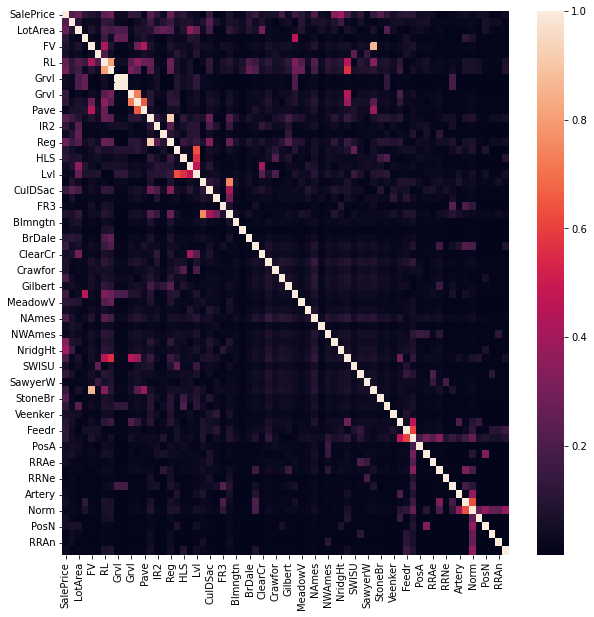

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(abs(location_properties_fit.corr()))

**Target variable analysis **

In [ ]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


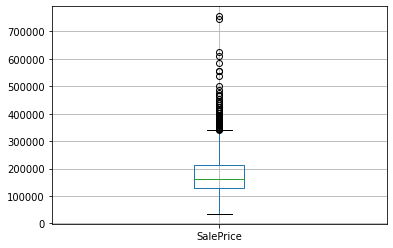

In [ ]:
train.boxplot(column = 'SalePrice')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180921.20 and sigma = 79415.29



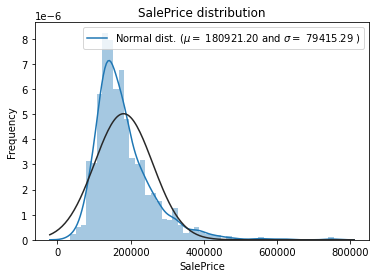

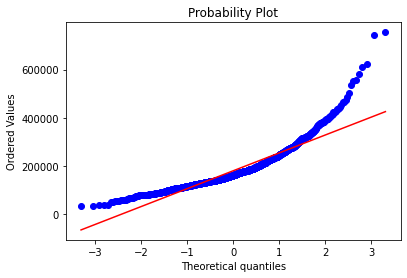

In [ ]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [ ]:
train['SalePrice'] = np.log1p(train['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


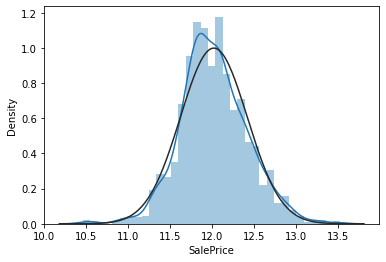

In [ ]:
sns.distplot(train['SalePrice'] , fit=norm);

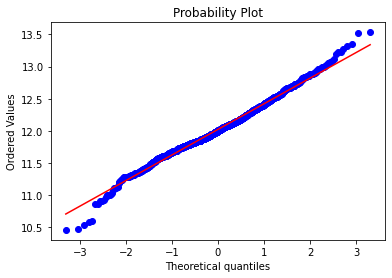

In [ ]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

why normalize...

 *target value if linear transformable, so apply all linear models**

In [ ]:
#architectural_properties

In [ ]:
#location_properties

In [ ]:
#year_properties

In [ ]:
df = pd.concat([architectural_properties,year_properties,location_properties], axis = 'columns')

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df.isna().sum()

Utilities        0
LandSlope        0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorc

In [ ]:
cols = df.columns

num_cols = df._get_numeric_data().columns

In [ ]:
df.columns

Index(['Utilities', 'LandSlope', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'SaleType',
       'SaleCondition', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold',
       'YrSold', 'MSZ

In [ ]:
num_cols

Index(['OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold', 'LotFrontage',
       'LotArea', 'SalePrice'],
      dtype='object')

In [ ]:
cat_columns = list(set(df.columns) - set(num_cols))

In [ ]:
cat_columns

['Condition2',
 'BldgType',
 'Street',
 'Neighborhood',
 'GarageType',
 'Fence',
 'Condition1',
 'GarageCond',
 'LandSlope',
 'BsmtExposure',
 'Heating',
 'CentralAir',
 'HeatingQC',
 'PoolQC',
 'ExterQual',
 'HouseStyle',
 'Alley',
 'BsmtQual',
 'Exterior2nd',
 'BsmtFinType2',
 'RoofStyle',
 'LandContour',
 'MSZoning',
 'PavedDrive',
 'GarageQual',
 'BsmtCond',
 'GarageFinish',
 'RoofMatl',
 'SaleType',
 'Utilities',
 'KitchenQual',
 'LotShape',
 'Exterior1st',
 'LotConfig',
 'BsmtFinType1',
 'Electrical',
 'SaleCondition',
 'FireplaceQu',
 'Functional',
 'Foundation',
 'ExterCond',
 'MasVnrType']

In [ ]:
df1 = df[np.intersect1d(df.columns, cat_columns)]

In [ ]:
df1_d = pd.get_dummies(df1).reset_index(drop=True)
df1_d.shape

(1460, 261)

In [ ]:
df2 = df[np.intersect1d(df.columns, num_cols)]

In [ ]:
df_train = pd.concat([df1_d,df2], axis = 'columns')

In [ ]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

In [ ]:
df_train.columns

Index(['Alley_Grvl', 'Alley_No', 'Alley_Pave', 'BldgType_1Fam',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'BsmtCond_Fa', 'BsmtCond_Gd',
       ...
       'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object', length=296)

In [ ]:
df_train.dropna(inplace = True)

In [ ]:
y = np.array(df_train['SalePrice'])
x = np.array(df_train.drop(columns= 'SalePrice'))

In [ ]:
df_train.isna().sum()

Alley_Grvl                              0
Alley_No                                0
Alley_Pave                              0
BldgType_1Fam                           0
BldgType_2fmCon                         0
BldgType_Duplex                         0
BldgType_Twnhs                          0
BldgType_TwnhsE                         0
BsmtCond_Fa                             0
BsmtCond_Gd                             0
BsmtCond_No                             0
BsmtCond_Po                             0
BsmtCond_TA                             0
BsmtExposure_Av                         0
BsmtExposure_Gd                         0
BsmtExposure_Mn                         0
BsmtExposure_No                         0
BsmtFinType1_ALQ                        0
BsmtFinType1_BLQ                        0
BsmtFinType1_GLQ                        0
BsmtFinType1_LwQ                        0
BsmtFinType1_No                         0
BsmtFinType1_Rec                        0
BsmtFinType1_Unf                  

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.22e+01  1.22e+01]
 [ 1.19e+01  1.18e+01]
 [ 3.30e+03  1.18e+01]
 [ 1.26e+01  1.19e+01]
 [ 1.18e+01  1.18e+01]
 [ 1.25e+01  1.25e+01]
 [ 1.28e+01  1.25e+01]
 [ 1.18e+01  1.18e+01]
 [ 1.18e+01  1.14e+01]
 [ 1.15e+01  1.14e+01]
 [ 1.20e+01  1.20e+01]
 [ 1.18e+01  1.19e+01]
 [ 1.18e+01  1.18e+01]
 [ 1.20e+01  1.19e+01]
 [ 1.21e+01  1.21e+01]
 [ 1.23e+01  1.24e+01]
 [ 1.18e+01  1.17e+01]
 [ 1.18e+01  1.18e+01]
 [ 1.20e+01  1.22e+01]
 [ 1.22e+01  1.23e+01]
 [ 1.22e+01  1.23e+01]
 [ 1.24e+01  1.24e+01]
 [ 1.24e+01  1.25e+01]
 [ 1.19e+01  1.21e+01]
 [ 1.25e+01  1.24e+01]
 [ 1.24e+01  1.24e+01]
 [ 1.20e+01  1.20e+01]
 [ 1.14e+01  1.15e+01]
 [ 1.18e+01  1.17e+01]
 [ 1.25e+01  1.25e+01]
 [ 1.19e+01  1.20e+01]
 [ 1.21e+01  1.21e+01]
 [ 1.31e+01  1.32e+01]
 [ 1.18e+01  1.17e+01]
 [ 1.17e+01  1.18e+01]
 [ 1.23e+01  1.22e+01]
 [ 1.15e+01  1.14e+01]
 [ 1.29e+01  1.28e+01]
 [ 1.18e+01  1.20e+01]
 [ 1.21e+01  1.21e+01]
 [ 1.22e+01  1.21e+01]
 [ 1.18e+01  1.19e+01]
 [ 1.20e+01  1.20e+01]
 [ 1.27e+01

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-7587176238756.42

# Linear regularization

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [ ]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [ ]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.355755103726842, tolerance: 0.012711597193823119
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.215990703888606, tolerance: 0.012711597193823119
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.062632967149806, tolerance: 0.012800536619740498
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.7

In [ ]:
rmse_cv(model_lasso).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.26810388616299, tolerance: 0.010226524382766024
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.241189521093396, tolerance: 0.010226524382766024
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.098006335213556, tolerance: 0.01035816315936106
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.324

0.14683410689261248

In [ ]:
model_ridge = RidgeCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [ ]:
rmse_cv(model_ridge).mean()

0.16236549861787863

**what it did assign weight to which features **

*conclusion, the model has many useless features*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


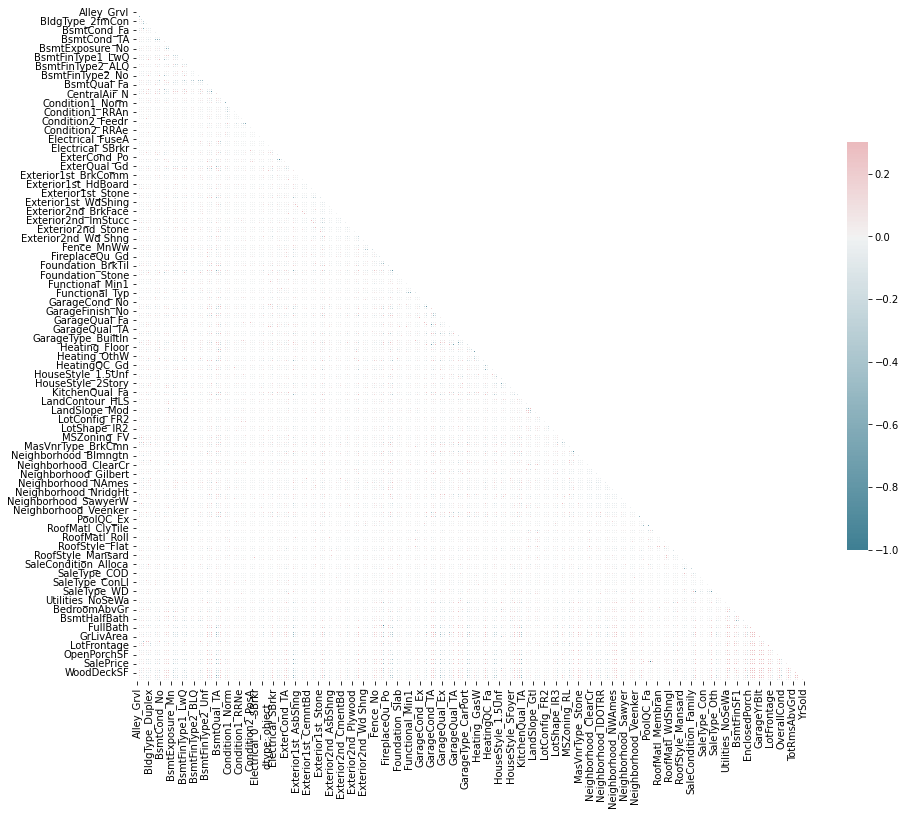

In [ ]:
corr = df_train.corr(method ='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

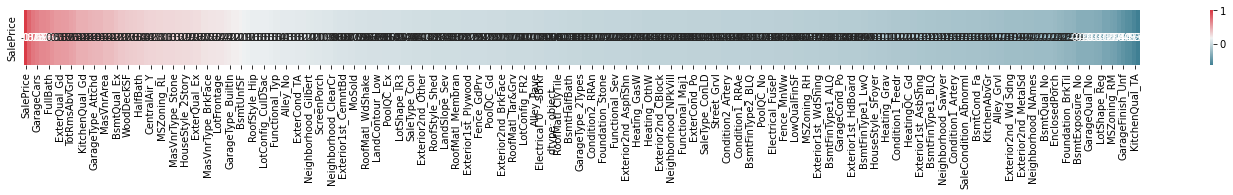

In [ ]:
f, ax = plt.subplots(figsize=(25, 1))
SalePrice = corr.sort_values(by=['SalePrice'], ascending=False).head(1).T
SalePrice = SalePrice.sort_values(by=['SalePrice'],ascending=False).T
sns.heatmap(SalePrice, cmap=cmap, annot=True)
plt.show()

In [ ]:
lst = SalePrice.columns[1:20]

In [ ]:
#VIF 

In [ ]:
lst

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'GarageArea',
       'FullBath', 'TotalBsmtSF', '1stFlrSF', 'ExterQual_Gd', 'YearRemodAdd',
       'Foundation_PConc', 'TotRmsAbvGrd', 'Fireplaces', 'HeatingQC_Ex',
       'KitchenQual_Gd', 'OpenPorchSF', 'LotArea', 'GarageType_Attchd',
       'GarageYrBlt'],
      dtype='object')

In [ ]:
df_train_adj = df_train[np.intersect1d(df_train.columns, lst)]

In [ ]:
y = np.array(df_train['SalePrice'])
x = np.array(df_train_adj)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[12.14 12.19]
 [11.79 11.81]
 [11.93 11.83]
 [12.57 11.9 ]
 [11.88 11.76]
 [12.39 12.47]
 [12.51 12.5 ]
 [11.7  11.75]
 [11.64 11.45]
 [11.63 11.42]
 [11.88 12.03]
 [11.77 11.87]
 [11.7  11.77]
 [11.8  11.9 ]
 [12.   12.08]
 [12.12 12.43]
 [11.73 11.66]
 [11.78 11.76]
 [11.96 12.23]
 [11.91 12.3 ]
 [12.25 12.32]
 [12.23 12.38]
 [12.33 12.47]
 [11.88 12.07]
 [12.41 12.4 ]
 [12.32 12.38]
 [12.06 12.01]
 [11.53 11.46]
 [11.69 11.7 ]
 [12.54 12.49]
 [11.88 11.98]
 [12.14 12.14]
 [12.85 13.23]
 [11.81 11.74]
 [11.5  11.82]
 [12.25 12.24]
 [11.54 11.39]
 [12.76 12.84]
 [12.12 11.95]
 [12.17 12.11]
 [12.03 12.07]
 [11.78 11.86]
 [12.07 12.02]
 [12.6  12.67]
 [11.24 10.86]
 [12.73 12.72]
 [12.25 12.4 ]
 [11.72 11.75]
 [12.05 12.09]
 [11.49 11.3 ]
 [11.76 11.65]
 [12.38 12.49]
 [11.74 11.86]
 [12.61 12.58]
 [12.25 12.33]
 [12.1  12.08]
 [11.3  11.13]
 [11.58 11.74]
 [12.41 12.29]
 [11.61 11.35]
 [11.4  11.45]
 [12.12 12.07]
 [12.33 12.39]
 [12.43 12.54]
 [12.66 12.68]
 [13.05 13.23]
 [12.46 12

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8479077604386883

In [ ]:
# https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm

In [ ]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])

Test set evaluation:
_____________________________________
MAE: 0.10192750671481694
MSE: 0.02411792190093102
RMSE: 0.15529945879149426
R2 Square 0.8513054152458697
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.039894691452428806
MSE: 0.003504143894920474
RMSE: 0.05919580977502102
R2 Square 0.9778324311520287
__________________________________


In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.38216789069452245
MSE: 4.781736611499348
RMSE: 2.18671822864752
R2 Square -28.48091227640432
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.22074133730402987
MSE: 0.08453514090655785
RMSE: 0.2907492749888774
R2 Square 0.46522214489094027
__________________________________


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)